In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-traffic-solve)

The following are parameters and a function relevant to defining the problem.

In [2]:
rho_c = 1080
rho_m = 380
q_m = 10000
Q0prime = (
    lambda rho: q_m
    * 4
    * rho_c**2
    * (rho_c - rho_m)
    * rho_m
    * (rho_m - rho)
    / (rho * (rho_c - 2 * rho_m) + rho_c * rho_m) ** 3
)

Here we create a discretization on $m=800$ points.

In [3]:
x, Dx, Dxx = FNC.diffper(800, [0, 4])

Next we define the ODE resulting from the method of lines.

In [4]:
ode = lambda t, rho: -Q0prime(rho) * (Dx @ rho) + ep * (Dxx @ rho)

Our first initial condition has moderate density with a small bump. Because of the diffusion present, we use a stiff solver for the IVP.

In [5]:
from scipy.integrate import solve_ivp
rho_init = 400 + 10 * exp(-20 * (x - 3) ** 2)
ep = 0.02
sol = solve_ivp(ode, [0, 1.0], rho_init, method="Radau", dense_output=True)

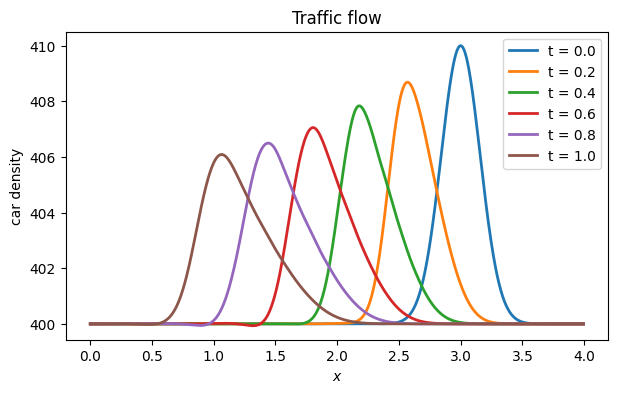

In [6]:
for t in linspace(0, 1, 6):
    plot(x, sol.sol(t), label=f"t = {t:.1f}")

xlabel("$x$"),  ylabel("car density")
legend(),  title("Traffic flow");

The bump slowly moves backward on the roadway, spreading out and gradually fading away due to the presence of diffusion.

In [7]:
from matplotlib.animation import FuncAnimation
fig, ax = subplots()
curve = ax.plot(x, rho_init)[0]
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
ax.set_xlabel("$x$")
ax.set_ylabel("density")
ax.set_ylim(400, 410)
ax.set_title("Traffic flow")
def snapshot(t):
    curve.set_ydata(sol.sol(t))
    time_text.set_text(f"t = {t:.2f}")

anim = FuncAnimation(fig, snapshot, frames=linspace(0, 1, 101))
anim.save("traffic-small.mp4", fps=30)
close()